# Trabajo Práctico: N°1
# Laboratorio de Datos - I.C - 1C 2024
## Integrantes:

> Caterina Nagela - 193/23

> Francisco Rizzi - 766/23

> Tiziano Lemes - 796/23

Fecha de entrega: 28 de mayo - 2024

## ***Creators***
|[<img src="https://i.imgur.com/4IosyVI.jpeg" width=200><br><sub>Caterina Nagela</sub>](https://www.linkedin.com/in/caterina-nagela-585503310/)<br><sub>Data Science Student</sub>|[<img src="https://i.imgur.com/danOJQk.jpeg" width=200 height=200 styles="object-fit: cover;"><br><sub>Francisco Rizzi</sub>](https://www.linkedin.com/in/franciscorizzi/)<br><sub>Data Science Student</sub>|[<img src="https://i.imgur.com/YTsY6cg.jpeg" width=200><br><sub>Tiziano Lemes</sub>](https://www.linkedin.com/in/tiziano-ignacio-lemes-160505310/)<br><sub>Data Science Student</sub>|
|---|---|---|


#Procesamiento de datos

In [ ]:
!pip install formulaic

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from formulaic import model_matrix
from formulaic import Formula
import datetime

# Ejercicio 1


 A )

> Visualizar el tipo de datos de cada columna. Transformar la columna
**DIA_TRANSPORTE** para que sea reconocida como una fecha.

.

---

Comenzamos visualizando el dataframe. Y luego aplicamos la funcion `pd.to_datetime()` a la columna en si.





In [ ]:
datosSube = pd.read_csv('sube-2023.csv')

# Visualizamos el dataframe
display(datosSube.head())

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


In [ ]:

# Vemos el tipo de dato de la columna DIA TRANSPORTE
display(datosSube.dtypes[0:1])

# Cambiamos el nombre de la columna y le aplicamos la funcion to datetime
datosSube["DIA_TRANSPORTE"] = pd.to_datetime(datosSube["DIA_TRANSPORTE"])

# Confirmamos que ahora es tipo datetime
display(datosSube.dtypes[0:1])


DIA_TRANSPORTE    object
dtype: object

DIA_TRANSPORTE    datetime64[ns]
dtype: object

# Ejercicio 1

 B )
 > Agregar tres columnas al DataFrame:
   
 > **FECHA_DIA** : debe indicar el nombre del día de la semana correspondiente a DIA_TRANSPORTE.

 > **FECHA_ORDINAL** : debe indicar el ordinal correspondiente a DIA_TRANSPORTE y debe ser un entero (int).

 > **FECHA_MES** : debe indicar el mes correspondiente a DIA_TRANSPORTE

.

---
Creamos las nuevas columnas en el dataframe indexando sobre ellas y usando la columna del item anterior (que ahora es de tipo datetime).

Para poder crear estas nuevas columnas en formato personalizado utilizamos `datosSube["DIA_TRANSPORTE"].apply()`.

Y sin olvidar de castear la columna `"FECHA_ORDINAL"`.



In [ ]:
datosSube["FECHA_DIA"] = datosSube["DIA_TRANSPORTE"].apply( lambda x : x.strftime("%a"))
datosSube["FECHA_MES"] = datosSube["DIA_TRANSPORTE"].apply( lambda x : x.strftime("%m"))
datosSube["FECHA_ORDINAL"] = datosSube["DIA_TRANSPORTE"].apply( lambda x : x.strftime("%d"))

datosSube["FECHA_ORDINAL"] = datosSube["FECHA_ORDINAL"].astype(int)

# Revisamos lo que agregamos
datosSube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   472291 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   472291 non-null  object        
 2   LINEA            472291 non-null  object        
 3   AMBA             472291 non-null  object        
 4   TIPO_TRANSPORTE  472291 non-null  object        
 5   JURISDICCION     469742 non-null  object        
 6   PROVINCIA        469720 non-null  object        
 7   MUNICIPIO        469720 non-null  object        
 8   CANTIDAD         472291 non-null  int64         
 9   DATO_PRELIMINAR  472291 non-null  object        
 10  FECHA_DIA        472291 non-null  object        
 11  FECHA_MES        472291 non-null  object        
 12  FECHA_ORDINAL    472291 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 46.8+ MB


#Ejercicio 2:

> Crear el DataFrame **datos_amba**, el cual sólo debe tener datos de AMBA y debe excluir datos
preliminares. Además, al ejecutar `datos_amba.head()` debe observarse el siguiente orden y
formato de columnas:


> ![FotoTemporal](https://cdn.discordapp.com/attachments/1242121476145156140/1245078599783157830/image.png?ex=6657714e&is=66561fce&hm=f791da6ba5d666008432d149329574e8bd262c207dadfed89e9945d2f32fd2a5&)

---

Filtramos los datos del dataframe anterior utilizando de indice cuales son las lineas de la columna `datosSube["AMBA"] == "SI"` que cumplen dicha condicion.

Renombramos y pasamos a minusculas utilizando `datos_amba.rename()` y dandole la funcion o diccionario correspondientes.

Y por ultimo, reestablecemos el orden y nos quedamos con las columnas que nos interesan utilizando `datos_amba.reindex(columns=ReqCol)` donde como parametro, pasamos el nuevo orden o las columnas requeridas.



In [ ]:
#Separamos todos los datos para los transportes que sean del amba.
datos_amba = datosSube[ datosSube [ "AMBA" ] == "SI" ]

#Pasamos a minuscula los nombres de las columnas y renombramos.
datos_amba = datos_amba.rename(columns={"DIA_TRANSPORTE":"fecha"})
datos_amba = datos_amba.rename(columns={"CANTIDAD":"pasajeros"})
datos_amba = datos_amba.rename(str.lower, axis='columns')

#Ordenamos las columnas de la manera que se pedía.
ReqCol= ['fecha', 'fecha_dia', 'fecha_mes', 'fecha_ordinal' , 'jurisdiccion', 'linea', 'pasajeros', 'tipo_transporte']
datos_amba = datos_amba.reindex(columns=ReqCol)

#Muestro
display( datos_amba )

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO
...,...,...,...,...,...,...,...,...
472214,2023-12-31,Sun,12,31,MUNICIPAL,LINEA_552_BSAS,4189,COLECTIVO
472216,2023-12-31,Sun,12,31,MUNICIPAL,LINEA_553_BSAS,5229,COLECTIVO
472238,2023-12-31,Sun,12,31,NaN,LINEA_A,30931,SUBTE
472242,2023-12-31,Sun,12,31,NaN,LINEA_B,34714,SUBTE


#Ejercicio 3

Utilizando datos_amba, identificar:

> A - la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de
transporte

.

---

Primero tomamos el total, para ello sumamos TODOS los pasajeros del dataset del amba Utilizando `datos_amba["pasajeros"].sum()`.

Luego agrupamos sumamos el total de los pasajeros para cada grupo, mejor dicho, cada tipo de transporte del dataframe, es basicamente la funcion anterior pero en el dataframe `datos_amba.groupby("tipo_transporte")`.

Y lo dividimos por el total.

In [ ]:
#3a
TOTAL= datos_amba["pasajeros"].sum()

display((datos_amba.groupby("tipo_transporte")["pasajeros"].sum()/TOTAL).round(2))

tipo_transporte
COLECTIVO    0.84
SUBTE        0.07
TREN         0.09
Name: pasajeros, dtype: float64

#Ejercicio 3

Utilizando datos_amba, identificar:

> B - la tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

.

---

Comenzamos separando los datos del dataframe que solo sean del tipo de transporte subte. Y los agrupamos por mes y por linea. Algo asi como: `datosSubte.groupby(["fecha_mes", "linea"])`

Luego, para cada uno de estos grupos, sumamos el total de pasajeros y buscamos cual es el maximo de estos grupos (es decir, cual es el mes y linea que tienen la cantidad maxima de pasajeros a lo largo del mes)

Y por ultimo, nos quedamos solo con el indice, dado a que no se nos pide la cantidad, sino cual es el mes y linea que logran ese maximo.


In [ ]:
#3b
#Primero vemos los datos de transporte que sean subte y los agrupamos por mes y linea.
aux= datos_amba[datos_amba["tipo_transporte"] == "SUBTE"].groupby(["fecha_mes", "linea"])

#Sumamos la cantidad de pasajeros y nos fijamos si es el maximo de pasajeros.
aux = aux["pasajeros"].sum()
res = aux[ aux == aux.max()]
display(res.index[0])

('08', 'LINEA_B')

#Ejercicio 3

Utilizando datos_amba, identificar:

> C - el día hábil con menor desvío estándar en cantidad de pasajeros

.

---

Primero, separamos del dataframe aquellos datos cuyos dias sean entre Lunes a Viernes. Usamos isin, para buscar cuales son los elementos de esa columna que cumplen lo descripto. Algo asi como:

`data[ data["day"].isin(["Mon", "Tue", "Wed", "Thu", "Fri"]) ]`

Ahora tomamos `MEDIA`, que es el promedio de cada uno de los dias del año. Para ello agrupamos por dia los datos, tomamos la media de pasajeros de cada uno de esos dias. Y luego el promedio del promedio de pasajeros por cada uno de los dias.

In [ ]:
#3c
habiles = datos_amba[ datos_amba["fecha_dia"].isin(["Mon", "Tue", "Wed", "Thu", "Fri"]) ]

# Promedio de cada dia, y el promedio de el promedio de cada uno de los dias.
MEDIA= habiles.groupby("fecha")["pasajeros"].mean().mean()

# Desviacion utilizando el promedio diario
def desviacion (x):
    return ((((x-MEDIA)**2)/(x.size-1)).sum())**(1/2)

# Aplicamos la formula en cada dia.
DailySTD = habiles.groupby("fecha")["pasajeros"].apply( lambda x: desviacion(x))
aux= DailySTD[DailySTD==DailySTD.min()]

print(f" Day: {aux.index[0].strftime('%a')}, Date: {aux.index[0].strftime('%d')} / {aux.index[0].strftime('%m')} / 2023. \n Mean= {MEDIA.round(2)}  DayStd={round(aux.item(), 2)}")

 Day: Mon, Date: 21 / 08 / 2023. 
 Mean= 27288.1  DayStd=20140.39


#Análisis Exploratorio.

#Ejercicio 4

> Realicen un análisis exploratorio de los datos, aplicando las herramientas de visualización (seaborn.objects, seaborn y/o matplotlib) y de resumen de datos (media, mediana, desvío estándar, operaciones sobre el DataFrame, etc.).

> El objetivo es entender, comparar y/o estudiar aspectos o patrones en la cantidad de pasajeros del transporte público.

> No están limitades a usar sólo el dataset de 2023 (en el link hay datasets
desde 2020 a 2024). Pueden hacer comparaciones interanuales, enfocarse en un solo tipo de transporte, etc.

> En el Notebook, las visualizaciones y resúmenes de datos que realicen deben estar acompañados por las conclusiones que obtengan a partir de ellos.

#***Consecuencias de los evento culturales en el uso de transporte publico***

> Nuestro analisis explorativo radica en el estudio de las consecuencias en el transporte publico a lo largo de un evento cultural significativo. El estudio se centrara a lo largo del AMBA y seremos nosotros quienes seleccionen algunos eventos de distintos años, entre 2022, 2023 y 2024 para poder estudiarlos.

>Pretendemos una respuesta positiva y significativa en la frecuencia de uso de los transportes publicos. Algunas preguntas emergentes de esto, podrian considerar.

> > ¿Habra una subida del uso del transporte publico?

> > ¿Que tanto impacto tiene en el transporte estos eventos?

> > ¿Podemos pretender que se cumpla siempre?


> Antes de continuar con el estudio, vamos a crear un formateador de datos para poder procesar cada uno de los datasets de 2022, 2023 y 2024.

> Vamos a importar y formatear los datos con ello. Mostrar uno de los datasets para que quede claro que tipo de informacion estamos usando.

> Y por ultimo vamos a hacer un diccionario para cada uno de los años, donde la clave va ser el nombre del evento y guarda un array de strings con las fechas de los eventos en si.


In [ ]:
# Forma rapida de formatear data
def SubeFormatter ( data ):

    # Punto 1: Fecha, Dia, Mes y Ordinal

    data= data.rename(columns= {"DIA_TRANSPORTE":"fecha"})
    data["fecha"] = pd.to_datetime(data["fecha"])

    data["fecha_dia"] = data["fecha"].apply( lambda x : x.strftime('%a') )
    data["fecha_mes"] = data["fecha"].apply( lambda x : x.strftime('%m') )
    data["fecha_ordinal"] = data["fecha"].apply( lambda x : x.strftime('%d') )

    # Requiere que las primeras 4 columnas existan.
    rec= ['fecha', 'fecha_dia', 'fecha_mes', 'fecha_ordinal'] + data.columns.tolist()[1:-3]
    data = data.reindex(columns=rec)

    # Punto 2: AMBA y Rename
    #Pasamos a minuscula los nombres de las columnas
    data = data.rename(str.lower, axis='columns')
    # Renombro
    data = data.rename(columns={"cantidad":"pasajeros"})
    #Separamos todos los datos para los transportes que sean del amba.
    data = data[ data["amba"] == "SI" ]

    # Creo una columna del total diario para ese dia.
    dailySum = data.groupby("fecha")["pasajeros"].sum()
    data['total_diario'] = data["fecha"].apply(lambda x : dailySum[x])


    #Ordenamos las columnas de la manera que nos pedía el ejercicio.
    rec= ['fecha', 'fecha_dia', 'fecha_mes', 'fecha_ordinal', 'jurisdiccion', 'linea', 'pasajeros', 'tipo_transporte', 'total_diario']
    data = data.reindex(columns=rec)

    return data

In [ ]:
# Comienzo extrayendo datos del 2022 y 2024
DataSube2022= pd.read_csv('sube-2022.csv')
DataSube2023= pd.read_csv('sube-2023.csv')
DataSube2024= pd.read_csv('sube-2024.csv')

# Y les formateo
DataSube2022 = SubeFormatter(DataSube2022)
DataSube2023 = SubeFormatter(DataSube2023)
DataSube2024 = SubeFormatter(DataSube2024)

# Visualizamos
display(DataSube2024.head())


,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte,total_diario
0,2024-01-01,Mon,01,01,MUNICIPAL,1,175,COLECTIVO,1631471
1,2024-01-01,Mon,01,01,MUNICIPAL,2B,14,COLECTIVO,1631471
4,2024-01-01,Mon,01,01,PROVINCIAL,BS_AS_LINEA_326,209,COLECTIVO,1631471
6,2024-01-01,Mon,01,01,MUNICIPAL,BS_AS_LINEA_522,145,COLECTIVO,1631471
7,2024-01-01,Mon,01,01,MUNICIPAL,BS_AS_LINEA_527,485,COLECTIVO,1631471


In [ ]:
# Fechas de los recitales:
# 2022
Eventos2022 = {
    "LollaPalooza": ["2022-03-18", "2022-03-19", "2022-03-20"],
    "Dualipa":["2022-09-14", "2022-09-15"],
    "Harry Styles":["2022-12-03", "2022-12-04"],
    "Francia segundo (ganamos)":["2022-12-18"],
    "Festejo Mundial":["2022-12-20"]
}


# 2023
Eventos2023 = {
    "LollaPalooza": ["2023-03-17", "2023-03-18", "2023-03-19"],
    "Taylor Swift" : ["2023-11-09", "2023-11-12"],
    "Bad Gyal":["2023-12-07", "2023-12-08"]
}


#2024
Eventos2024 = {
    "LollaPalooza": ["2024-03-15", "2024-03-16", "2024-03-17"],
    "Marcha Universitaria": ["2024-04-23"],
}


## Boxplot

> Para empezar el estudio, se nos ocurrio que un buen punto de partida era estudiar la frecuancia de uso diaro para cada uno de los dias de la semana.

> Es decir... Un boxplot, donde aprovechariamos a usar la columna `"total_diario"` (el total de pasajeros para ese dia). Para ello, sacamos las fechas repetidas y nos basta con hacer un boxplot.

> Con esto podemos ver la presencia de Outliers en nuestro dataframe (si existen) y de paso, tener un estimativo de que esperar del comportamiento de la media de cada uno de los dias de la semana.

> Este grafico se repite para cada año...

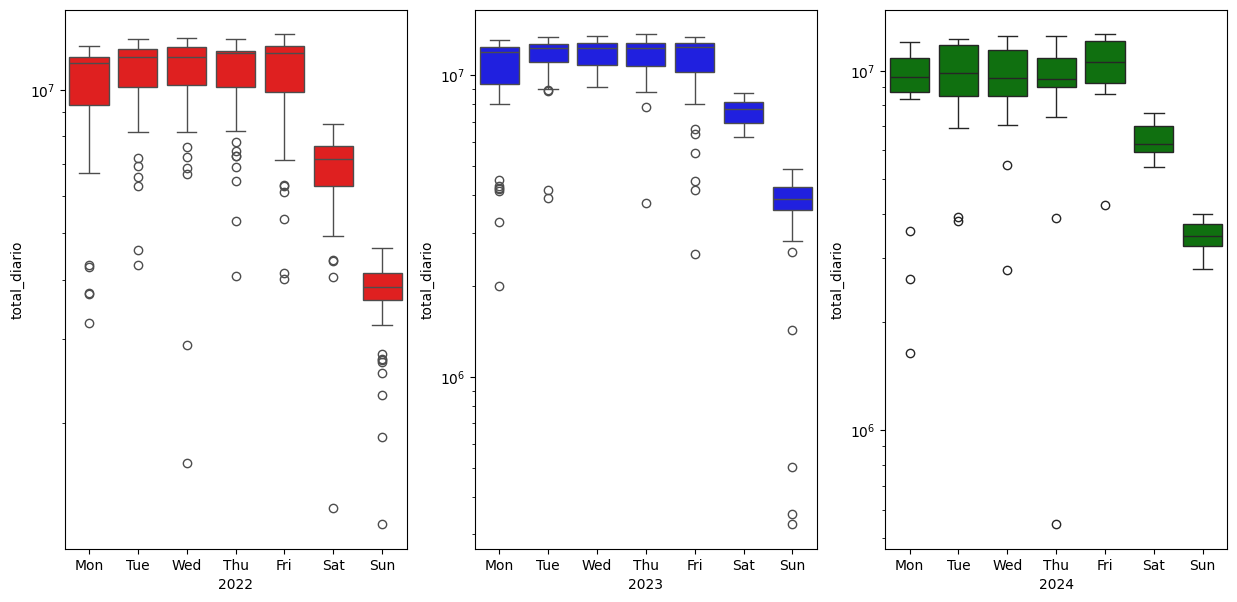

In [ ]:
days= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# BoxPlot comparativo para cada año

# Frecuencia de uso diaro de todos los transportes
graficos = ['2022', '2023', '2024']
fig, ax = plt.subplots(1, len(graficos), figsize=(15, 7))

sns . boxplot ( DataSube2022.drop_duplicates("fecha") , x = "fecha_dia" , y = "total_diario" , order=days, color="red", ax=ax[0], log_scale=True).set_xlabel(graficos[0])
sns . boxplot ( DataSube2023.drop_duplicates("fecha") , x = "fecha_dia" , y = "total_diario" , order=days, color="blue", ax=ax[1], log_scale=True).set_xlabel(graficos[1])
sns . boxplot ( DataSube2024.drop_duplicates("fecha") , x = "fecha_dia" , y = "total_diario" , order=days, color="green", ax=ax[2], log_scale=True).set_xlabel(graficos[2])

plt.show()

# compensasion entre si

### Conclusion del boxplot

> Hay varios outliers a lo largo de cada dia de la semana, pero curiosamente todos son outliers "inferiores" (por debajo de la media).

> Una deduccion logica es que pudo haber sido un dia feriado o un paro de transporte general.

> Nuestro concepto radica en la idea de que los eventos masivos generan un impacto positivo bastante considerable en la frecuencia de uso del transporte publico. Y no tenemos outliers superiores, lo que basicamente no va a afectar demasiado un par de valores que tiren "por debajo" la media.

> Nota: Esto no significa que no los vamos a considerar despues.

> Algo curioso es que si un transporte queda inhabilitado, no significa que la actividad se detenga, solo "aumenta" la actividad en los otros transportes alternativos que no fueron afectados. Lo que genera un efecto de "amortiguamiento" en los datos

> En otras palabras, una linea de transporte podria contener outliers superiores, pero se compensaran con outliers inferiores de otras lineas.

> Por contra parte, para que se genere un outlier superior, considerando que usualmente el Transporte publico tiene una media aprox de 15.000.000. Un outlier superior representaria un minimo de 22.500.000 usos. Pero en el amba habitan 13.985.794 personas.

> Esto significa basicamente deberia darse una subida GIGANTESCA para poder encontrar uno. Porque todas las personas del amba deberian tomar 1 bondi (1.65, es decir casi 2)

## Histograma

> Generaremos un histograma en el plazo de la semana del evento, donde podremos comparar el uso de transporte publico.

Referencia de colores:

![Event Days](https://img.shields.io/badge/Event%20Days-D005D0?style=for-the-badge)

![Normal Days](https://img.shields.io/badge/Normal%20Days-E0A0A0?style=for-the-badge)

![Mean of Day](https://img.shields.io/badge/Mean%20of%20Day-050505?style=for-the-badge)

> Vamos a utilizar una funcion que vamos a llamar para cada uno de los eventos. Que va a ser la encargada de generar cada uno de los graficos, la llamaremos `HistogramGenerator()`. Y otra funcion que se va a encargar de llamar a la anterior por cada diccionario, que llamaremos `GenHist()`.

In [ ]:
# Event Histogram Generator
# El intervalo NO PUEDE REPETIR DIAS DE SEMANA

def HistogramGenerator( eventDates, intervalo, dataframe, text):
    x, y= intervalo
    I=(dataframe['fecha'] >= x) & (dataframe['fecha'] <= y)

    data = dataframe[I].drop_duplicates("fecha").reset_index()
    auxin= data["fecha"].isin(eventDates)


    sumDias= dataframe.groupby("fecha_dia")["pasajeros"].sum()
    cantidadDias= dataframe.drop_duplicates("fecha").groupby("fecha_dia").count()["total_diario"]
    dailyMean= sumDias / cantidadDias

    # dailyMean= dataframe.groupby("fecha_dia")["pasajeros"].mean()

    data["media_diaria"] = data["fecha_dia"].apply( lambda x : dailyMean[x])

    p=  (so.Plot()
        .add( so.Bars(edgecolor="#050505", fill= False), label="Media", x=data["fecha_dia"], y=data["media_diaria"] ).scale(y="sqrt")
        .add( so.Bars(color="#E0A0A0"), label="Other", x=data["fecha_dia"], y=data["total_diario"] ).scale(y="sqrt")
        .add( so.Bars(color="#D005D0"), label="Event", x=data[auxin]["fecha_dia"], y=data[auxin]["total_diario"] ).scale(y="sqrt")
        .label(x="", y="Total_Diario", title= text, legend="Days: "))

    return p


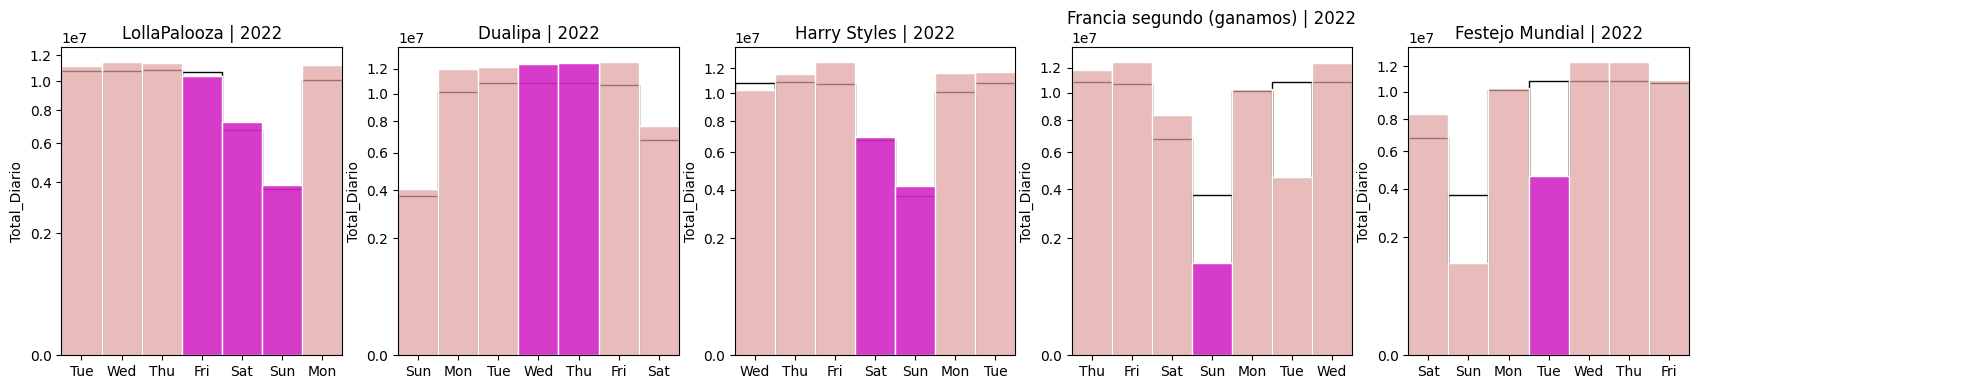

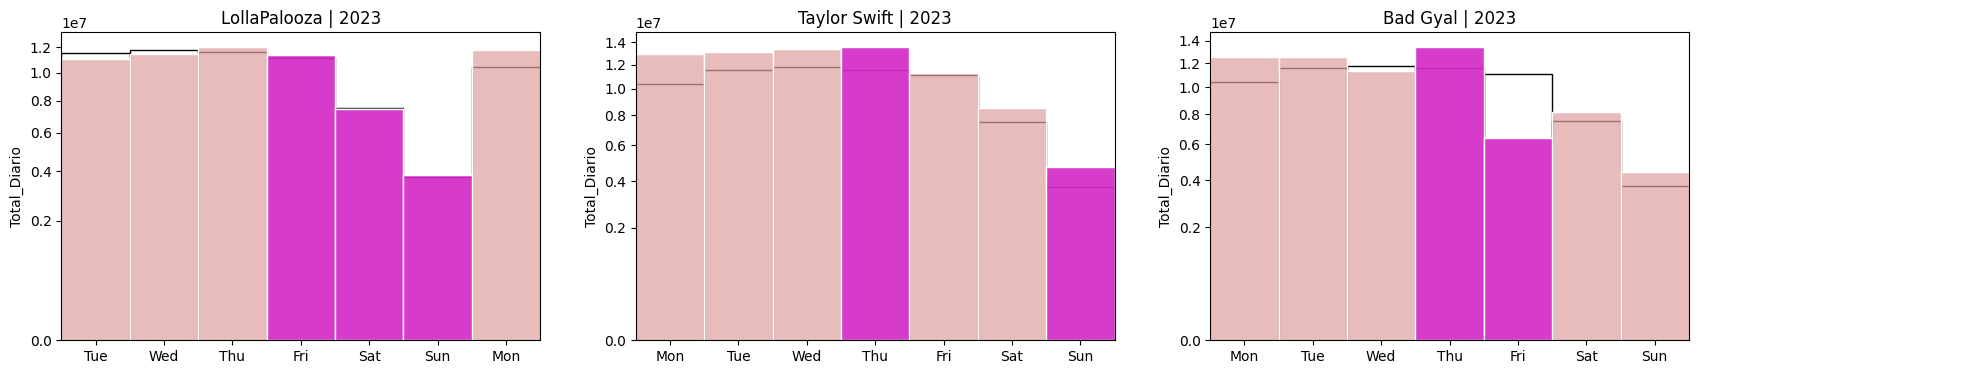

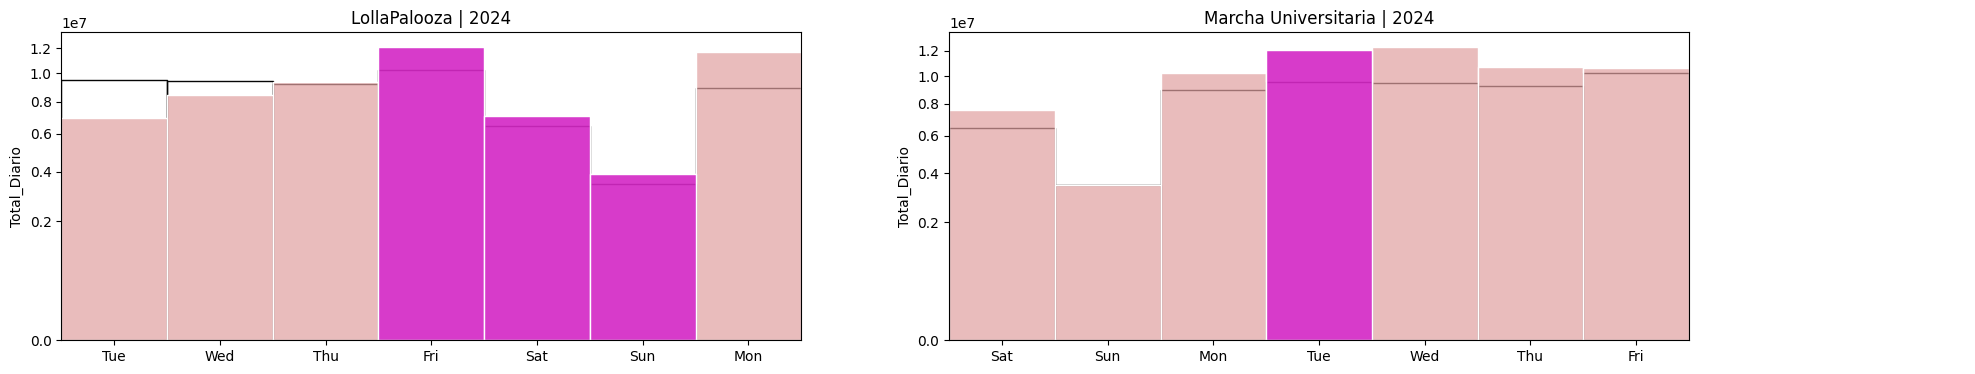

In [ ]:
from datetime import timedelta


# Maximo
def GenHist(Event, dataframe, year):
    i=0
    fig, ax = plt.subplots(1, len(Event),  figsize=(21, 4))

    for (evento, fechas) in Event.items():

        intervalo= (pd.to_datetime(fechas[0])- timedelta(days=3), pd.to_datetime(fechas[0])+timedelta(days=3))

        p= HistogramGenerator(fechas, intervalo, dataframe, evento + f" | {year}").on(ax[i]).plot()
        i+=1

    plt.show()

# Generamos 2022
GenHist(Eventos2022, DataSube2022, "2022")
# Generamos 2023
GenHist(Eventos2023, DataSube2023, "2023")
# Generamos 2024
GenHist(Eventos2024, DataSube2024, "2024")

#Los meses de inactividad tiran abajo la media. Hilar fino


## ***Conclusion Histogramas.***

Los eventos culturales que consideramos fueron los siguientes:

> 2022: Lollapalooza, Dualipa, Harry Styles, y los 2 festejos del mundial.

> 2023: Lollapalooza, Taylor Swift y Bad Gyal.

> 2024: Lollapalooza, Marcha universitaria.

A simple vista, podemos observar que hay eventos que aumentan 2 millones de usos por arriba de la media la cantidad de pasajeros a lo largo del dia. Es sorprendente!

---

## ***Conclusiones generales:***

> Podemos ver que la mayoria de eventos suelen respetar la media o estar por arriba. Los que no, suelen tener una explicacion logica.

> Por ejemplo, el 8 de diciembre de 2023, bad gyal hizo un concierto en pleno feriado. Hecho que no es contemplado en la media.

> Otro ejemplo, es la contundencia que tuvo taylor swift, que en pleno domingo, logro subir 1 millon de usos por arriba de la media el transporte publico en el amba. Tambien 2 millones de usos arriba de la media su concierto del jueves.

> Consideramos que hay eventos que destacaron y merecen un analisis mas profundo:

---

## ***Conclusiones sobre los festejos del Mundial:***

> El mundial tiene las bajada de la media mas grande de todos los eventos. ¿Acaso esto tiene sentido?

> Resulta que si, el resultado del uso total del mundial esta completamente justificado, enn muchos casos los colectivos dejaron de funcionar y tambien,los colectivos que funcionaban, no cobraron los pasajes.

> Lo que se traduce a una bajada de la media de ese domingo en particular, correlacionada a la idea de que si no se cobran los pasajes, no hay registro de la cantidad total de pasajeros.

---

## ***Conclusiones sobre la marcha Universitaria:***

> El uso del transporte publico durante la marcha universitaria de 2024, fue aproximadamente 3 millones de usos por arriba de la media, realmente una locura. Dado a que la media esperada para ese dia es de 9.536.590 en todos los transportes del amba!

> Pero muchos medios reportaron 430.000 personas a lo largo del dia. ¿Tiene esto sentido?

> Si consideramos a las 430.000 personas como el motivo del desvio de la media para este dia, se requiere que cada una de ellas tome alrededor de 6 o 7 transportes dentro del amba (Fuera de la media, es decir, fuera de los que tomaban habitualmente).

> ¿Tiene sentido que una persona tome mas de 7 transportes extras dentro del amba para asistir a una marcha en la zona mas accesible de capital?

> Esto sugiere que en realidad fueron muchas mas personas en la marcha, si fueron, podran entender notoriamente que 430 mil es una cifra bastante ajustada para una marcha tan grande.

> Incluso, si en promedio una persona que fue a la marcha tomo entre 2 a 4 transportes (ida y vuelta) a lo largo del amba, exclusivamente para la marcha. Podemos estimar hasta 1 millon de personas dentro de este evento.

## ***Nociones generales sobre el estudio***

> A priori, es entendible que puedan haber otras razones por las que el transporte publico a lo largo de ese dia pueda subir, pero en esos dias, no ocurrieron otros eventos a la par. Y como mencionamos anteriormente, estamos considerando la cantidad de usos totales arriba de la media. Sabemos que hay un efecto "amortiguante" en el uso total, Lo que limita bastante las razones por las que se produce un aumento arriba de la media.

> Podemos entender que enero e incluso tal vez febrero, representan una baja de la media, considerando la falta de actividad en general, sobretodo en enero.


> Sabiendo esto, vamos a prodecer a repetir los graficos con el fin de poder observar dos hechos. La diferencia de uso de transporte publico a lo largo de los meses. Y la diferencia entre el grafico original y el grafico solo en el mes en el que transcurre el evento.



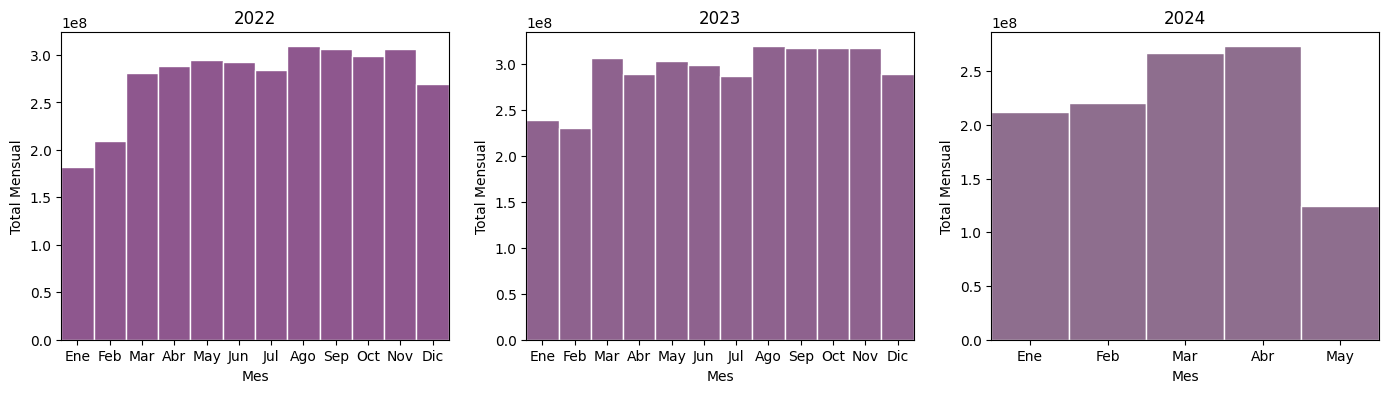

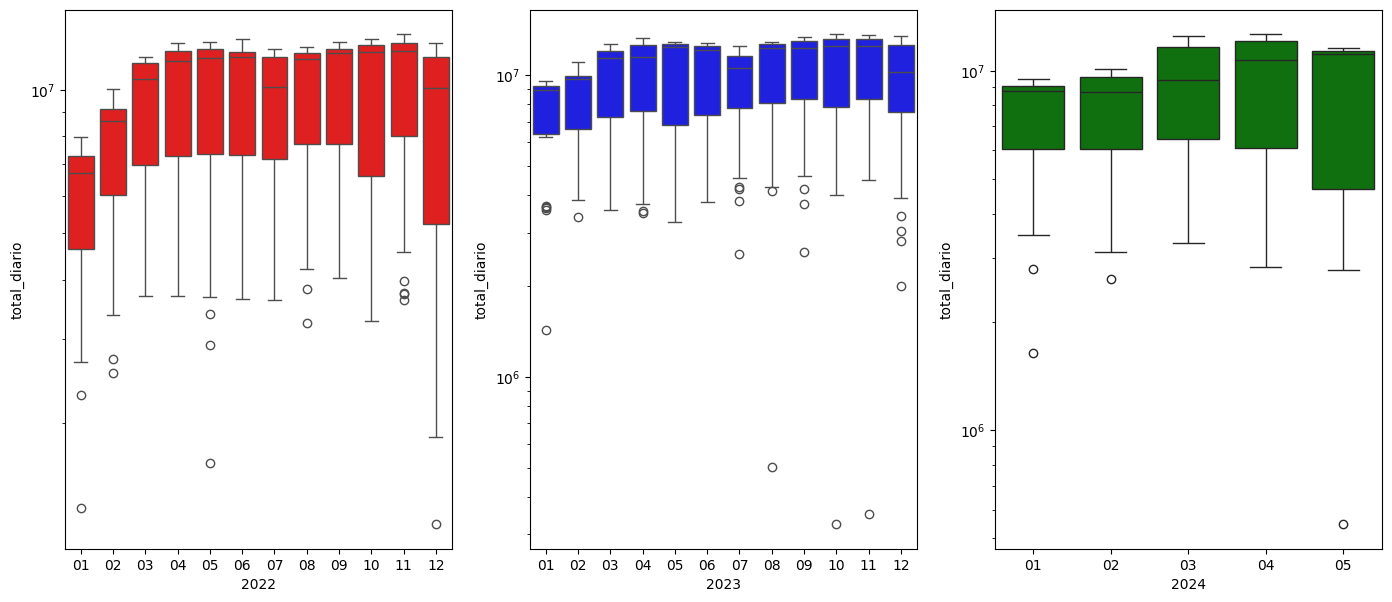

In [ ]:
# Teorizo lo siguiente:
# Si consideramos que hay "meses" con menor actividad
# Podemos verlo haciendo un BOXPLOT! de los meses.


# BoxPlot comparativo para cada año
# Frecuencia de uso mensual de todos los transportes
graficos = ['2022', '2023', '2024']
fig, ax = plt.subplots(1, len(graficos), figsize=(17, 4))

totalMensual2022= DataSube2022.drop_duplicates("fecha").groupby("fecha_mes")["total_diario"].sum()
totalMensual2023= DataSube2023.drop_duplicates("fecha").groupby("fecha_mes")["total_diario"].sum()
totalMensual2024= DataSube2024.drop_duplicates("fecha").groupby("fecha_mes")["total_diario"].sum()

totalMensual2022.index = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
totalMensual2023.index = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
totalMensual2024.index = ["Ene", "Feb", "Mar", "Abr", "May"]

so.Plot().add( so.Bars(color="#5F105F", width=1), x=totalMensual2022.index, y=totalMensual2022) .layout() .label(x="Mes", y="Total Mensual", title= "2022").on(ax[0]).plot()
so.Plot().add( so.Bars(color="#5F205F", width=1), x=totalMensual2023.index, y=totalMensual2023) .layout() .label(x="Mes", y="Total Mensual", title= "2023").on(ax[1]).plot()
so.Plot().add( so.Bars(color="#5F305F", width=1), x=totalMensual2024.index, y=totalMensual2024) .layout() .label(x="Mes", y="Total Mensual", title= "2024").on(ax[2]).plot()

plt.show()

# BoxPlot comparativo para cada año
# Frecuencia de uso diaro de todos los transportes
graficos = ['2022', '2023', '2024']
fig, ax = plt.subplots(1, len(graficos), figsize=(17, 7))

sns . boxplot ( DataSube2022.drop_duplicates("fecha") , x = "fecha_mes" , y = "total_diario" , color="red", ax=ax[0], log_scale=True).set_xlabel(graficos[0])
sns . boxplot ( DataSube2023.drop_duplicates("fecha") , x = "fecha_mes" , y = "total_diario" , color="blue", ax=ax[1], log_scale=True).set_xlabel(graficos[1])
sns . boxplot ( DataSube2024.drop_duplicates("fecha") , x = "fecha_mes" , y = "total_diario" , color="green", ax=ax[2], log_scale=True).set_xlabel(graficos[2])

plt.show()

## ***El impacto de Enero y Febrero***

> Es clarisimo, ahora que visualizamos este grafico, que enero y febrero tienen una bajada de la media general bastante grande. Sobretodo en 2022 y 2023. Entonces, repetiremos los graficos de la siguiente manera:

> Mismos histogramas pero sin cosiderar Enero y Febrero en el dataset.

> Mismos histogramas pero comparando la semana pasada al evento, la semana del evento, y la semana siguiente al evento (usando solo el dataset del mes).

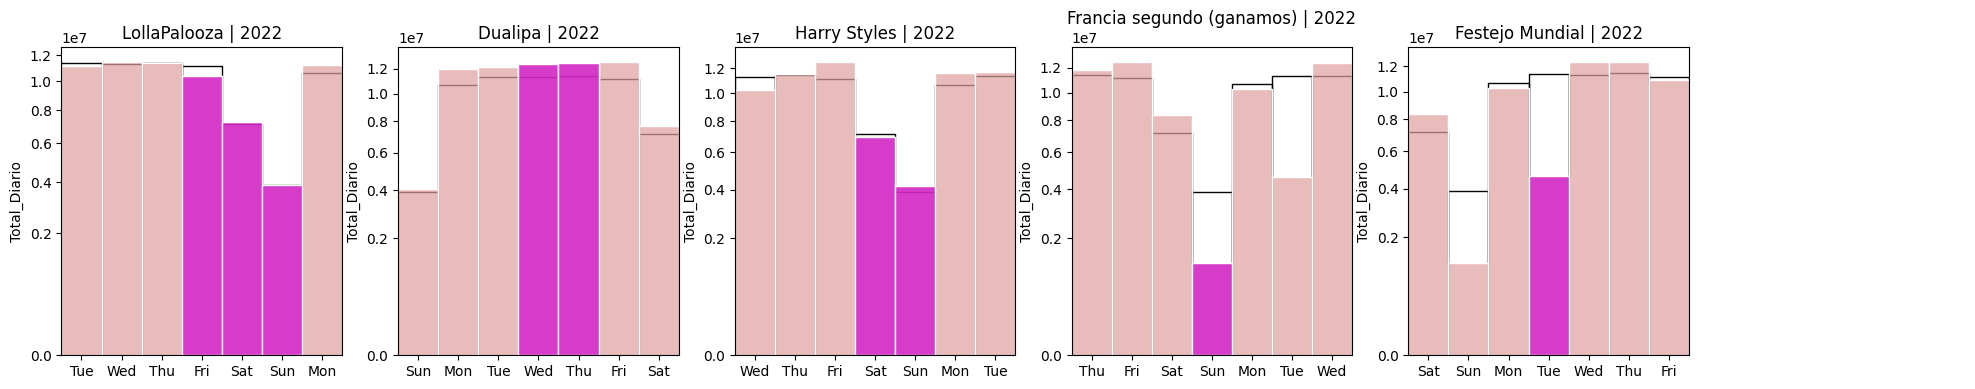

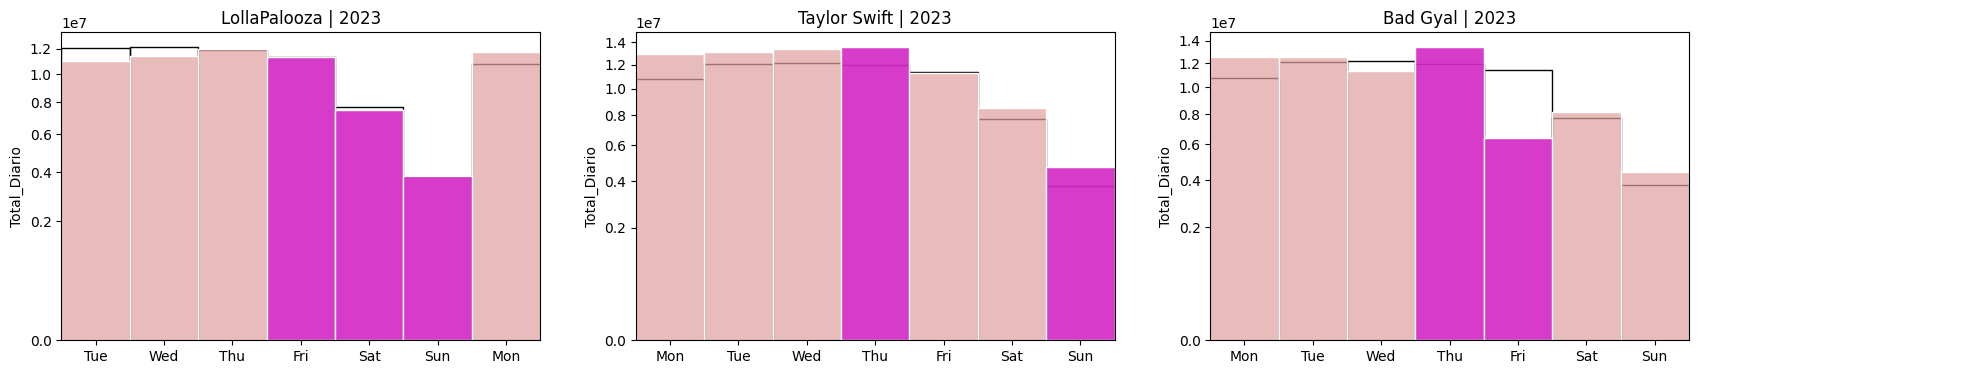

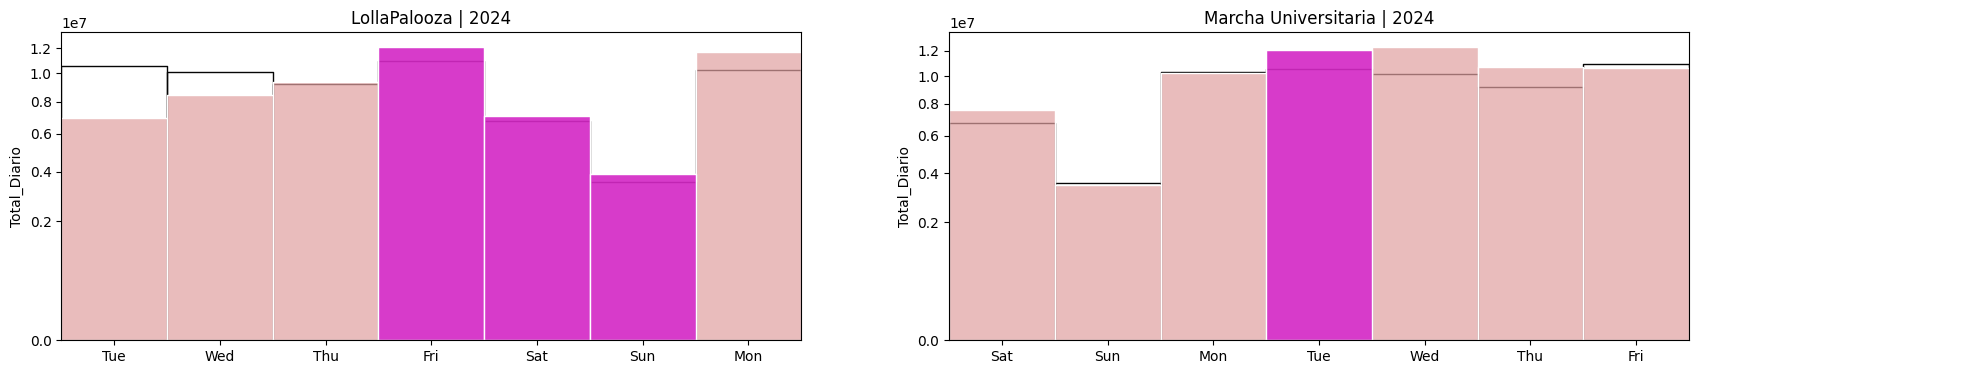

In [ ]:
# Vamos a hilar en fino, utilizando los mismos eventos sin considerar Enero o Febrero.

# Generamos 2022
GenHist(Eventos2022, DataSube2022[ (DataSube2022['fecha'] >= "2022-03-01") ], "2022")
# Generamos 2023
GenHist(Eventos2023, DataSube2023[ (DataSube2023['fecha'] >= "2023-03-01") ], "2023")
# Generamos 2024
GenHist(Eventos2024, DataSube2024[ (DataSube2024['fecha'] >= "2024-03-01") ], "2024")


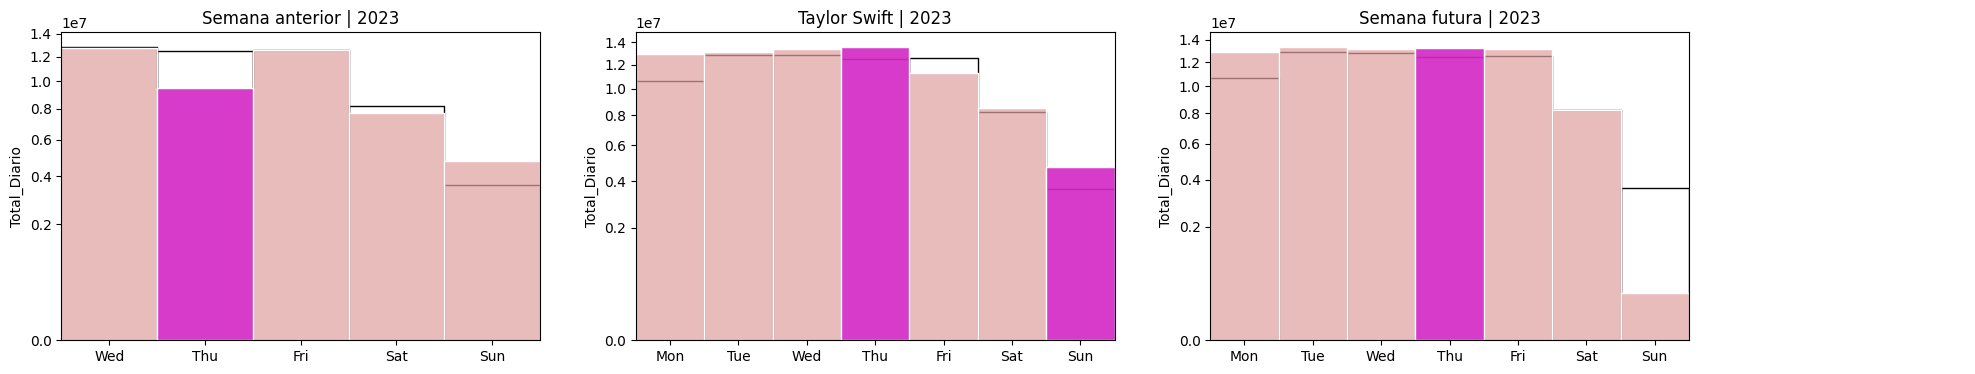

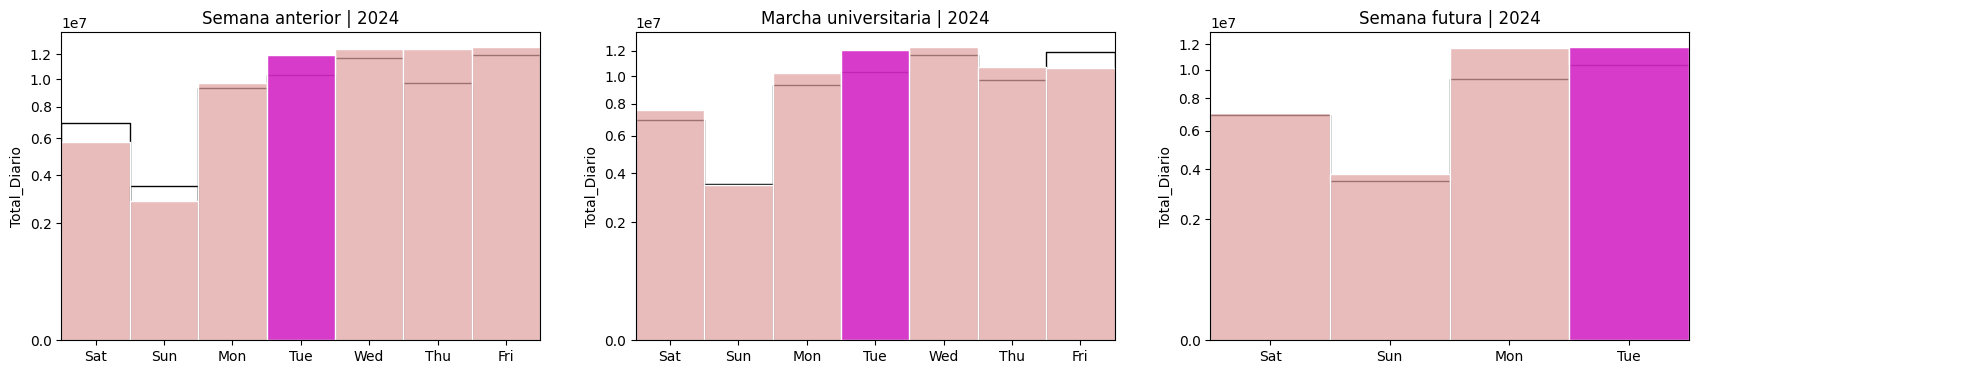

In [ ]:
# Ahora vamos a analizar cuales son las consecuencias en el uso del transporte cuando hay eventos masivos en el país,
#como lo es un festejo del mundial, una marcha multitudinaria o un concierto como el de Taylor Swift donde miles de
#fanaticos vinieron de todas partes del mundo para verla cantar.

# La marcha universitaria 24-04-2024
# Mundial 18-12-2022
# Taylor 2023-11-09

#No solo nos vamos a enfocar en el día del evento, sino en que es lo que sucedio durante esa misma semana, la anterior y
#la siguiente para demostrar nuestro punto.
#Procedemos a graficar, semana pasada, evento, semana consiguiente.

iconic={
    "Semana anterior" : ["2023-11-02"],
    "Taylor Swift" : ["2023-11-09", "2023-11-12"],
    "Semana futura" : ["2023-11-16"],
}

GenHist(iconic, DataSube2023[ (DataSube2023['fecha'] >= "2023-11-01") & (DataSube2023['fecha'] <= "2023-11-30") ], "2023")

# Mismo analisis en la marcha
iconic={

    "Semana anterior" : ["2024-04-16"],
    "Marcha universitaria" : ["2024-04-23"],
    "Semana futura" : ["2024-04-30"],
}

GenHist(iconic, DataSube2024[ (DataSube2024['fecha'] >= "2024-04-01") & (DataSube2024['fecha'] <= "2024-04-30") ], "2024")


## ***Conclusiones Finales***

> El impacto de enero y febrero afecta bastante a la media general, hasta casi 1 millon de usos. Pero realmente no es tan significativo considerando las diferencias entre las semanas.

>  Son 4 datos de cada dia de la semana considerando aprox 50 normales, consideramos que es algo que cambia un poco el grafico, pero no lo suficiente como para descartar los estudios en si.

> Por ejemplo, a las conclusiones anteriores sobre la marcha universitaria, podemos considerar que ya no son 3 millones de usos por arriba. Sino que son 2 millones de usos. Aplicando el mismo analisis estimamos hasta 750mil personas en el evento. (casi el doble de lo que los medios habían reportado).

> Esto sirve también para solventar la cifra de asistencia que la UBA había estimado, aproximadamente unas 800.000 personas.

---

### ***Cierre***
> En general, es un estudio que se nos hizo bastante curioso, encontramos una correlacion bastante grande entre los eventos culturales significativos, que era bastante intuitiva de por si, y el uso del transporte publico total en el amba.

> Podriamos mejorar el estudio filtrando las lineas que llevan a cada uno de los eventos, e investigando que en lineas allegadas no hayan habido afecciones que puedan justificar un outlier "superior" en el uso de esa linea individual.

> (Algo que estimamos que logicamente pueda ocurrir)

> Y que este estudio, depende completamente de que los pasajes sean registrados por medio del pago (algo que sucede con el estudio del caso "Festejo Mundial 2022")


#Modelado

# Ejercicio 5

Modelo de regresión. En este ítem, intentaremos ajustar la cantidad de pasajeros que viajan por día en una línea de colectivos utilizando la información de pasajeros por día de otras líneas. Para esto, utilizaremos el dataset `sube-2023-regresion.csv`

A )

> Generar un DataFrame en el que las columnas sean las líneas de colectivo
`(TIPO_TRANSPORTE == "COLECTIVO")` de AMBA de jurisdicción nacional `(PROVINCIA == "JN")` y las observaciones sean los días del año. Es decir, cada fila del DataFrame corresponde a un día del año, y en esa fila deben figurar la cantidad de pasajeros que viajaron en cada línea de
colectivo en el día correspondiente.

.

---

Primero importamos el dataset, filtramos los datos del dataset que cumplan estar en la jurisdiccion nacional, sean del amba y sean colectivos.


In [ ]:
sube2023regresion = pd.read_csv("sube-2023-regresion.csv")
sube2023regresion.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


In [ ]:
#5 a
#Vamos a seleccionar del dataFrame de datos_amba solo los colectivos que tienen jurisdiccion nacional.
datos_ColectivoJN = sube2023regresion[(sube2023regresion["TIPO_TRANSPORTE"]=="COLECTIVO")& (sube2023regresion["JURISDICCION"]=="NACIONAL") & (sube2023regresion["AMBA"] == "SI")]
cols = datos_ColectivoJN.LINEA.unique () # Los nombres de las lineas de colectivo
#Hacemos un nuevo Data Frame donde tenga como index los dias del año y en las columnas las lineas de colectivo, en donde dicen cuantas personas viajaron ese día en esa linea.
pasajeros_por_linea = pd. DataFrame ()
for col in cols:
  datos_linea = datos_ColectivoJN [ datos_ColectivoJN.LINEA == col ][["DIA_TRANSPORTE", "CANTIDAD"]]
  datos_linea = datos_linea . set_index ("DIA_TRANSPORTE").rename(columns = {"CANTIDAD":col,"LINEA" : col})
  pasajeros_por_linea = pd.concat ([ pasajeros_por_linea , datos_linea ], axis = 1)

pasajeros_por_linea.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA,LINEA 119
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,4832.0,4839,2449,2184,3797,5317,1882,1573.0,3210,NaN
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,20333.0,16221,10486,12774,17374,23250,10322,7345.0,19362,NaN
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,23041.0,18448,12193,13949,19860,26294,11981,7925.0,21784,NaN
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,23928.0,18481,12888,14668,21235,27216,11787,7597.0,22972,NaN
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,24247.0,19300,12703,14199,23472,27073,11567,7811.0,23411,NaN


# Ejercicio 5

B )

> Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes

.

---

Agarramos el dataset y utilizamos la funcion `pasajeros_por_linea.dropna()`, especificando que vamos a soltar la columna completa en caso de encontrar datos faltantes.


In [ ]:
#5 b
#Eliminamos las columnas que tengan datos faltantes
pasajeros_por_linea = pasajeros_por_linea.dropna(axis="columns")
pasajeros_por_linea.shape

(250, 124)

# Ejercicio 5

C )

>  Se quiere ajustar la cantidad de pasajeros en la línea BSAS_LINEA_009 en función de los pasajeros en otras líneas. Proponer tres modelos de regresión distintos. En cada modelo, pueden utilizarse la información solo de otras 5 líneas de colectivos (pueden ser distintas líneas de colectivo en los distintos modelos). Los criterios de selección de esas 5 columnas los determinan ustedes, y deben estar explicitados en el informe.

.

---

Referencia de colores para los graficos:

![Lunes](https://img.shields.io/badge/Lunes%20-D98554?style=for-the-badge)
![Martes](https://img.shields.io/badge/Martes%20-D78AC3?style=for-the-badge)
![Miercoles](https://img.shields.io/badge/Miercoles%20-5AA86A?style=for-the-badge)
![Jueves](https://img.shields.io/badge/Jueves%20-C14F53?style=for-the-badge)
![Viernes](https://img.shields.io/badge/Viernes%20-8171B2?style=for-the-badge)
![Sabado](https://img.shields.io/badge/Sabado%20-927860?style=for-the-badge)
![Domingo](https://img.shields.io/badge/Domingo%20-5979B3?style=for-the-badge)


![Dia Habil](https://img.shields.io/badge/Rlineal%20Laboral%20-090909?style=for-the-badge)
![Dia Sabado](https://img.shields.io/badge/Rlineal%20Sabado%20-300909?style=for-the-badge)
![Dia Domingo](https://img.shields.io/badge/RLineal%20Domingo%20-3009A9?style=for-the-badge)

> 300909

> Lo primero que realizamos es buscar las lineas de colectivos mas cercanas a la linea 09. En este caso son:

> Linea 45, Linea 20, Linea 28, Linea 100, Linea 37 y linea 70

> Utilizaremos justamente estas lineas porque tienen destinos similares en aunque sea la mitad de su recorrido, y conectan Lanus con Retiro. Lo que
resultara conveniente a la hora de predecir. No tendria tanto sentido utilizar una linea que este alejada (Como por ejemplo, el 34) debido a que tendrian distinta fluctuacion de pasajeros.

> Y considerando la fluctiacion de pasajeros, vamos a generar un grafico de puntos para ver la cantidad total de pasajeros por dia, de cada uno de los dias del año, y un boxplot por cada dia de semana para poder observar la presencia de outliers.

> Para esto crearemos una nueva columna llamada `FECHA_DIA` en el dataset, y a los graficos agregaremos una regresion lineal para los dias habiles, sabados y domingos.

<ipython-input-226-1a2afab14b26>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pasajeros_por_linea["FECHA_DIA"]  = pd.to_datetime(pasajeros_por_linea.index.tolist())


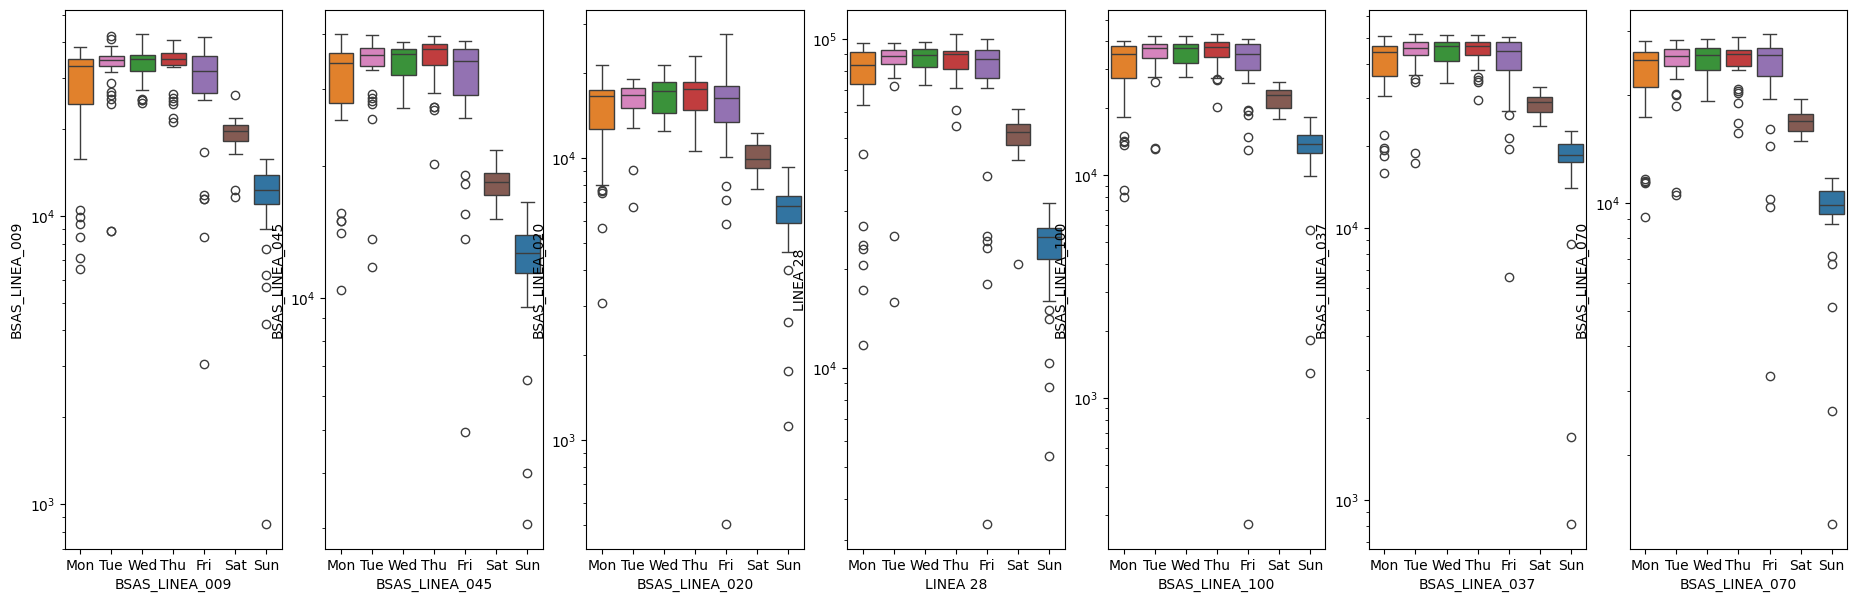

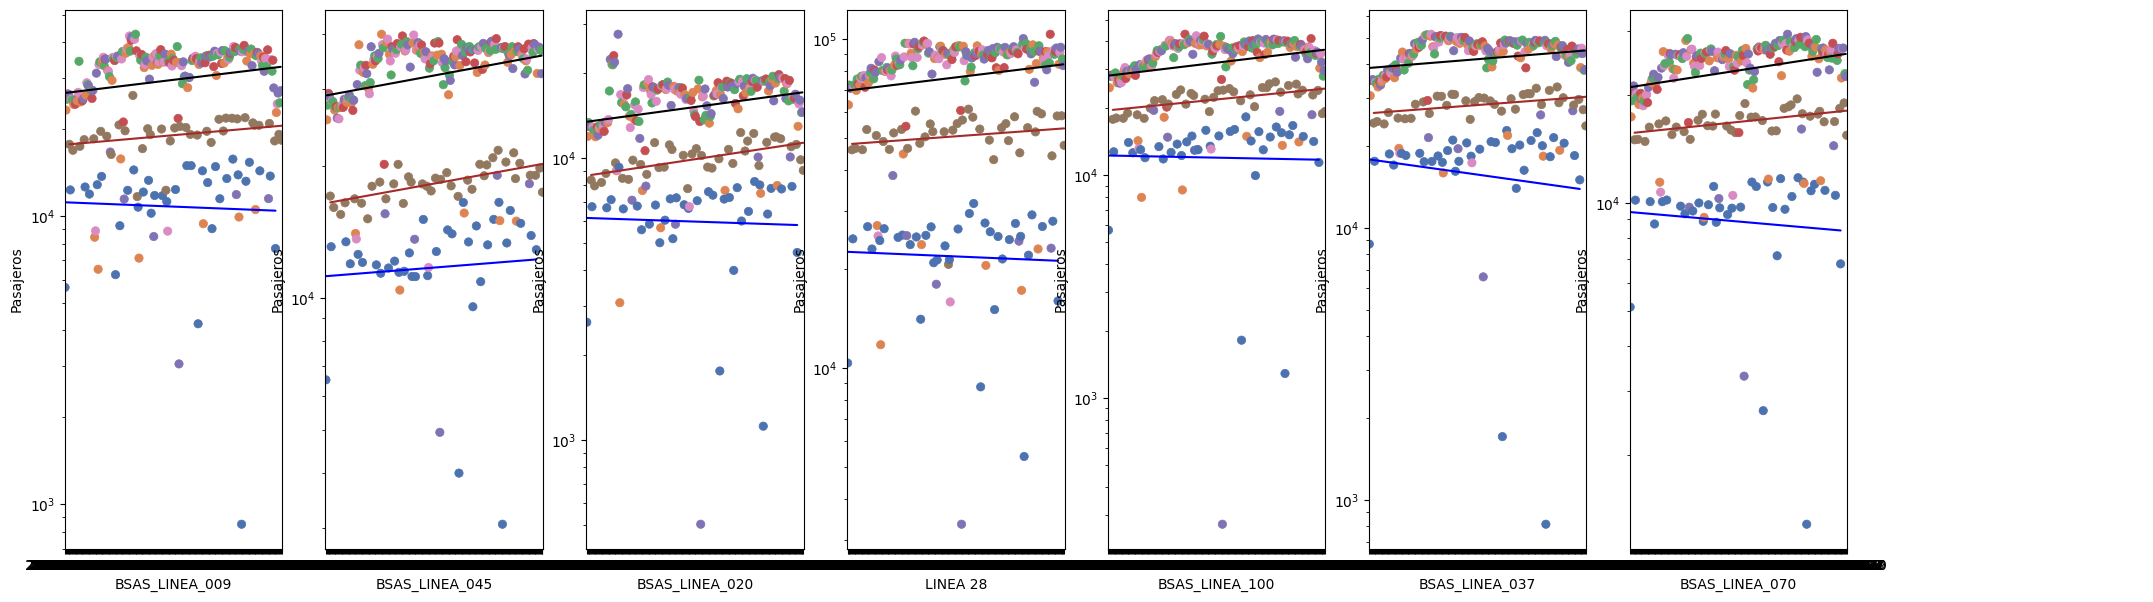

In [ ]:
# CREAMOS UNA NUEVA COLUMNA EN EL DF "FECHA DIA"

# Analisis grafico de patron de uso de la linea 09 y las que vamos a usar.

pasajeros_por_linea["FECHA_DIA"]  = pd.to_datetime(pasajeros_por_linea.index.tolist())

pasajeros_por_linea["FECHA_DIA"] = pasajeros_por_linea["FECHA_DIA"].apply(lambda x : x.strftime('%a'))


# Vamos a hacerlo mas bonito
Lineas = ["BSAS_LINEA_009", "BSAS_LINEA_045", "BSAS_LINEA_020", "LINEA 28", "BSAS_LINEA_100", "BSAS_LINEA_037", "BSAS_LINEA_070"]

fig, ax = plt.subplots(1, 7, figsize=(23, 7))

for i, linea in enumerate(Lineas):
    (
        sns . boxplot ( pasajeros_por_linea , x = "FECHA_DIA" , y = linea, hue="FECHA_DIA", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] , ax=ax[i], log_scale=True).set_xlabel(Lineas[i])
    )

fig, ax = plt.subplots(1, 7, figsize=(23, 7))

for i, linea in enumerate(Lineas):
    (
        so.Plot( data=pasajeros_por_linea )
        .add( so.Dot() ,x="DIA_TRANSPORTE", color="FECHA_DIA", y=linea).scale(y="log")
        .add( so.Line(color="black"), so.PolyFit(1), data=pasajeros_por_linea [ pasajeros_por_linea["FECHA_DIA"].isin(["Mon", "Tue", "Wed", "Thu", "Fri"]) ] ,x="DIA_TRANSPORTE", y=linea)
        .add( so.Line(color="brown"), so.PolyFit(1), data=pasajeros_por_linea [ pasajeros_por_linea["FECHA_DIA"].isin(["Sat"]) ] ,x="DIA_TRANSPORTE", y=linea)
        .add( so.Line(color="blue"), so.PolyFit(1), data=pasajeros_por_linea [ pasajeros_por_linea["FECHA_DIA"].isin(["Sun"]) ] ,x="DIA_TRANSPORTE", y=linea)

        .label(x=linea, y="Pasajeros", legend="Dia")
        .on(ax[i]).plot()
    )


# plt.legend()
plt.show()

### ***Nociones generales***

> Tienen un comportamiento MUY similar, consideramos un muy buen indicativo para empezar a trabajar. En el grafico, las pendientes de la regresion lineal de los dias habiles son muy parecidas. Tambien los son las del sabado y domingo, aunque en este ultimo varian bastante mas.

> Procedemos entonces a generar un dataframe que contenga lo que utilizaremos para nuestros modelos (detallaremos en el siguiente markdown), con:

> Un nombre que sea reconocible para la linea 28 por Formulaic.

> Tambien una columna que indique si el dia es laboral o no.

> Una columna que indique el mes.

> Y por ultimo, copiaremos los datos en un dataframe auxiliar, los normalizaremos para utilizarlo en un modelo de Ridge, y lo dividiremos en entrenamiento y testeo.

> `dataTrainT |  dataTestT `

> Nota: El modelo de Tizi fue modificado a ultimo momento, a efectos practicos, es lo mismo.

In [ ]:
#Las columnas que proveen información sobre las lineas elegidas fueron seleccionadas debido a la gran semejanza que poseen los recorridos de éstas con la línea que buscamos predecir.
#Las lineas de colectivo {45, 100, 28, 20, 37} comparten en su recorrido con la línea 9 zonas donde frecuentan un gran cúmulo de gente como lo son
#los alrededores de Lanus Oeste, Nueva Pompeya, Constitución, el metrobus de la Av. 9 de Julio o Retiro.


# Ahora hago los modelos de prediccion.

# ALERTA! ESTO CAMBIA EL NOMBRE DE LA LINEA!
pasajeros_por_linea = pasajeros_por_linea.rename( columns = {"LINEA 28" : "LINEA_28"} )


pasajeros_por_linea["TIPO_DIA"] = pasajeros_por_linea["FECHA_DIA"].apply( lambda x : x in ["Mon", "Tue", "Wed", "Thu", "Fri"] )


pasajeros_por_linea["FECHA_MES"]  = pd.to_datetime(pasajeros_por_linea.index.tolist())

pasajeros_por_linea["FECHA_MES"] = pasajeros_por_linea["FECHA_MES"].apply(lambda x : x.strftime('%m'))
pasajeros_por_linea["FECHA_MES"].astype(str)

# DATA SET FINAL!

# Como el plan es hacer ridge, normalizamos los datos.


columns = ["BSAS_LINEA_009", "BSAS_LINEA_045", "BSAS_LINEA_020", "LINEA_28", "BSAS_LINEA_100", "BSAS_LINEA_037"]
df = pasajeros_por_linea.copy()
df [ columns ] /= df [ columns ]. max ()

from sklearn . model_selection import train_test_split
dataTrain , dataTest = train_test_split ( df , test_size =0.2 , random_state = 2 )

#Apartamos el caso del modelo T que utiliza la linea 70
columnsT = ["BSAS_LINEA_009", "BSAS_LINEA_045", "BSAS_LINEA_020", "LINEA_28", "BSAS_LINEA_100", "BSAS_LINEA_070"]
dfT = pasajeros_por_linea.copy()
dfT [ columns ] /= dfT [ columns ]. max ()
dataTrainT , dataTestT = train_test_split ( dfT , test_size =0.2 , random_state = 2 )

# Separamos entrenamiento y testeo.

# Ejercicio 5

D )
> Si alguno de los modelos es Regresión Ridge, determinar mediante un esquema de validación el hiperparámetro α.

.

---

> Cerrando la idea del C, propondremos 3 modelos con distintas formulas, una por cada integrante. Pero todos seran modelos Ridge.

> ¿El motivo?, Queremos evitar el sobreajuste al tener tantas variables predictoras, el modelo es bastante complejo y queremos mitigar el efecto que puede llegar a tener coeficientes bastante grandes.

> A continuacion la formula de los modelos y una breve explicacion del motivo por el que fueron elegidas:

***Formula Fran***

`Linea 09 ~ ( LINEA 45 + LINEA 20 + LINEA 28 + LINEA 100 + LINEA 37) * TIPO_DIA`

> Razon: Yo considere el impacto individual que tenia cada una de las lineas que compartian similitudes en cuanto al recorrido con la linea 09, anteriormente habiamos revisado sus regresiones lineales y voy a aprovechar esas semejanzas evaluandolas por separado. Sin embargo, quiero que cada una considere si el dia en el que actuan es o no un dia habil. Por ello, la interaccion de cada una de las variables numericas correspondientes a las lineas que use, tiene una correlacion con la variable categorica binaria TIPO_DIA. La razon por la que no use directamente el dia en si, es para evitar el sobre-ajuste que ocurrio anteriormente.

***Formula Tizi***

`Linea 09 ~ ( (LINEA 45 : LINEA 100) + LINEA 28 + LINEA 20  + LINEA 70) + (FECHA_MES : FECHA_DIA)`

> Razon: Considere pertinente la elección del uso de otra línea, la que corresponde a la variable BSAS_LINEA_070, que presenta un recorrido similar al de la Línea 9 de forma que podemos visualizar una diferencia (tal vez notoria) con el resto de modelos. Tambien considere la relacion entre la linea 100 y 45 que existire entre ellos al pensar que comparten pasajeros de la misma zona (la cual acumula mucha gente). Buscamos enfocar la adición de la relación entre ambas líneas sin contar al aporte que darían estas por separado. Adicionando también de forma independiente a las lineas restantes y por último a la relación de la variables numérica y categórica (FECHA_MES y FECHA_DIA).

***Formula Cate***

`Linea 09 ~ ( LINEA 45 + LINEA 20 + LINEA 28 + LINEA 100 + LINEA 37) + FECHA_MES : FECHA_DIA`

> Razon: Elegimos 5 lineas de colectivos que hagan un recorrido parecido a la linea 9 y terminen todas en Lanus o alrededores. Para este modelo en específico, elegimos relacionar los dias de la semana con los meses del año. Esto es para relacionar los dias del año con la cantidad de pasajeros que lo utiliza.


---


Aclarado esto, proponemos modelos lineales simples para tener un punto de partida sobre el ajuste.

In [ ]:
# Creamos nuestros modelos lineales

FormF=" BSAS_LINEA_009 ~ (BSAS_LINEA_045 + BSAS_LINEA_020 + LINEA_28 + BSAS_LINEA_100 + BSAS_LINEA_037) * TIPO_DIA " #(Fran)
FormT=" BSAS_LINEA_009 ~ ((BSAS_LINEA_045 : BSAS_LINEA_100) + LINEA_28 + BSAS_LINEA_020 + BSAS_LINEA_070) + (FECHA_MES : FECHA_DIA)"  #(Tizi)
FormC=" BSAS_LINEA_009 ~ (BSAS_LINEA_045 + BSAS_LINEA_020 + LINEA_28 + BSAS_LINEA_100 + BSAS_LINEA_037) + FECHA_MES : FECHA_DIA" #(Cate)

#Las formulas elegidas para el modelo de predicción de la linea 9 son las siguientes :


#Formula T: La particularidad de este modelo pasa primero por la elección del uso de otra línea, la que corresponde a la variable BSAS_LINEA_070,
#que presenta un recorrido similar al de la Línea 9 de forma que podemos visualizar una diferencia (tal vez notoria) con el resto de modelos.
#El uso del : entre la linea 100 y 45 se debe a la interacción que existiría entre ellos al pensar que comparten pasajeros de la misma zona (la cual acumula mucha gente).
#Buscamos enfocar la adición de la relación entre ambas líneas sin contar al aporte que darían estas por separado.
#Adicionando también de forma independiente a las lineas restantes y por último a la relación de la variables numérica y categórica (FECHA_MES y FECHA_DIA).

#Formula C: Elegimos 5 lineas de colectivos que hagan un recorrido parecido a la linea 9 y terminen todas en Lanus o alrededores. Para este modelo en específico, elegimos relacionar los dias de la
#semana con los meses del año. Esto es para relacionar los dias del año con la cantidad de pasajeros que lo utiliza.

y1, X1= Formula(FormF).get_model_matrix(dataTrain)
y1test, X1test= Formula(FormF).get_model_matrix(dataTest)

y2, X2= Formula(FormT).get_model_matrix(dataTrainT)
y2test, X2test= Formula(FormT).get_model_matrix(dataTestT)

y3, X3= Formula(FormC).get_model_matrix(dataTrain)
y3test, X3test= Formula(FormC).get_model_matrix(dataTest)

modelF= linear_model.LinearRegression( fit_intercept=False)
modelT= linear_model.LinearRegression( fit_intercept=False)
modelC= linear_model.LinearRegression( fit_intercept=False)


modelF.fit(X1,y1)
modelT.fit(X2,y2)
modelC.fit(X3,y3)

display(f"El RCEM del modelo F lineal es: { mean_squared_error(y1test, modelF.predict(X1test)) **(1/2)}")
display(f"El RCEM del modelo T lineal es: { mean_squared_error(y2test, modelT.predict(X2test)) **(1/2)}")
display(f"El RCEM del modelo C lineal es: { mean_squared_error(y3test, modelC.predict(X3test)) **(1/2)}")

display(f"El R2 del modelo F lineal es: { r2_score(y1test, modelF.predict(X1test))}")
display(f"El R2 del modelo T lineal es: { r2_score(y2test, modelT.predict(X2test))}")
display(f"El R2 del modelo C lineal es: { r2_score(y3test, modelC.predict(X3test))}")


'El RCEM del modelo F lineal es: 0.045212071346104096'

'El RCEM del modelo T lineal es: 0.05611783936940299'

'El RCEM del modelo C lineal es: 0.055201552810531775'

'El R2 del modelo F lineal es: 0.9621064373556552'

'El R2 del modelo T lineal es: 0.9416207497667168'

'El R2 del modelo C lineal es: 0.9435116071428169'

###***Retomando el punto D***

> El modelo lineal parece bastante bueno, pero vamos a hacer ridge para mejorarlo igualmente. Para ello generamos un esquema de validacion para el hiperparametro.

> Entonces procedemos a simular con la misma lista de alphas, todos los modelos ridge para tener una base de donde empezar a buscar el alpha optimo y requerido. Haciendo validacion cruzada en cada iteracion y viendo cual optimiza mejor los resultados para cada uno de los modelos.

In [ ]:

# Ahora hacemos ridge

# Modelo F

cv= KFold(n_splits=5, random_state=54, shuffle=True)

alphas= np.array([0.001, 0.005, 0.1, 0.2, 0.5, 1])
# En la primer busqueda se acerca a 1 el mejor, veamos las inmediaciones

# alphas= np.array([1, 5, 10, 15])

for alpha in alphas:

    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidgeF = linear_model.Ridge(alpha = alpha, fit_intercept = False)
    modeloRidgeT = linear_model.Ridge(alpha = alpha, fit_intercept = False)
    modeloRidgeC = linear_model.Ridge(alpha = alpha, fit_intercept = False)

    rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
    rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
    rmse3 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind1 = 0
    ind2 = 0
    ind3 = 0

    # Modelo F
    for train_index, val_index in cv.split(X1):
        X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
        modeloRidgeF.fit(X_train, y_train)

        y_pred = modeloRidgeF.predict(X_val)
        rmse1[ind1] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind1 = ind1 + 1


    # Modelo T
    for train_index, val_index in cv.split(X2):
        X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
        modeloRidgeT.fit(X_train, y_train)

        y_pred = modeloRidgeT.predict(X_val)
        rmse2[ind2] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind2 = ind2 + 1


    # Modelo C
    for train_index, val_index in cv.split(X3):
        X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
        modeloRidgeC.fit(X_train, y_train)

        y_pred = modeloRidgeC.predict(X_val)
        rmse3[ind3] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind3 = ind3 + 1


    print(f"Para alpha = {alpha:.5f} \n El RCEM del Modelo F es: {rmse1.mean():.5f} \n El RCEM del Modelo T es: {rmse2.mean():.5f} \n El RCEM del Modelo C es: {rmse3.mean():.3f} \n")



# Mejor alpha que encontre 0.54

Para alpha = 0.00100 
 El RCEM del Modelo F es: 0.05477 
 El RCEM del Modelo T es: 0.06663 
 El RCEM del Modelo C es: 0.066 

Para alpha = 0.00500 
 El RCEM del Modelo F es: 0.05460 
 El RCEM del Modelo T es: 0.06635 
 El RCEM del Modelo C es: 0.066 

Para alpha = 0.10000 
 El RCEM del Modelo F es: 0.05437 
 El RCEM del Modelo T es: 0.06314 
 El RCEM del Modelo C es: 0.062 

Para alpha = 0.20000 
 El RCEM del Modelo F es: 0.05448 
 El RCEM del Modelo T es: 0.06222 
 El RCEM del Modelo C es: 0.061 

Para alpha = 0.50000 
 El RCEM del Modelo F es: 0.05516 
 El RCEM del Modelo T es: 0.06283 
 El RCEM del Modelo C es: 0.060 

Para alpha = 1.00000 
 El RCEM del Modelo F es: 0.05641 
 El RCEM del Modelo T es: 0.06554 
 El RCEM del Modelo C es: 0.061 



###***Observaciones***

Ya conseguimos una vision aproximada para cada modelo:

> Modelo F: 0.1 Aprox.

> Modelo T: 0.5 Aprox.

> Modelo C: 0.5 Aprox.

Ahora repetimos el proceso pero en las cercanias de esos alphas optimos para cada uno de los modelos:

In [ ]:
# Podemos entender 3 cosas
# El modelo F tiene como alpha mejor 0.1
# El modelo C tiene como alpha mejor 0.5
# El modelo T tiene como alpha mejor 0.5

# Estudiamos en los modelos en las cercanias de sus alphas


alphasF= np.array([0.55, 0.1, 0.15, 0.2])
alphasC= np.array([0.49, 0.5, 0.55, 0.6])
alphasT= np.array([0.49, 0.51, 0.5 , 0.59 ])

# Estudiamos las cercanias del modelo F

print("Cercanias del modelo F")
for alpha in alphasF:

    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidgeF = linear_model.Ridge(alpha = alpha, fit_intercept = False)

    rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind1 = 0

    # Modelo F
    for train_index, val_index in cv.split(X1):
        X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
        modeloRidgeF.fit(X_train, y_train)

        y_pred = modeloRidgeF.predict(X_val)
        rmse1[ind1] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind1 = ind1 + 1

    print(f"Para alpha = {alpha:.5f} El RCEM del Modelo F es: {rmse1.mean():.5f}")


print("\nCercanias del modelo C")
# Estudiamos las cercanias del modelo C
for alpha in alphasC:

    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidgeC = linear_model.Ridge(alpha = alpha, fit_intercept = False)

    rmse3 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind3 = 0

    # Modelo C
    for train_index, val_index in cv.split(X3):
        X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
        modeloRidgeC.fit(X_train, y_train)

        y_pred = modeloRidgeC.predict(X_val)
        rmse3[ind3] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind3 = ind3 + 1


    print(f"Para alpha = {alpha:.5f} El RCEM del Modelo C es: {rmse3.mean():.3f}")

# Estudiamos las cercanias del modelo T
print("\nCercanias del modelo T")
for alpha in alphasT:

    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidgeT = linear_model.Ridge(alpha = alpha, fit_intercept = False)

    rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind2 = 0

    # Modelo T
    for train_index, val_index in cv.split(X2):
        X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
        modeloRidgeF.fit(X_train, y_train)

        y_pred = modeloRidgeF.predict(X_val)
        rmse2[ind2] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind2 = ind2 + 1

    print(f"Para alpha = {alpha:.5f} El RCEM del Modelo T es: {rmse2.mean():.5f}")


Cercanias del modelo F
Para alpha = 0.55000 El RCEM del Modelo F es: 0.05529
Para alpha = 0.10000 El RCEM del Modelo F es: 0.05437
Para alpha = 0.15000 El RCEM del Modelo F es: 0.05441
Para alpha = 0.20000 El RCEM del Modelo F es: 0.05448

Cercanias del modelo C
Para alpha = 0.49000 El RCEM del Modelo C es: 0.060
Para alpha = 0.50000 El RCEM del Modelo C es: 0.060
Para alpha = 0.55000 El RCEM del Modelo C es: 0.060
Para alpha = 0.60000 El RCEM del Modelo C es: 0.060

Cercanias del modelo T
Para alpha = 0.49000 El RCEM del Modelo T es: 0.06222
Para alpha = 0.51000 El RCEM del Modelo T es: 0.06222
Para alpha = 0.50000 El RCEM del Modelo T es: 0.06222
Para alpha = 0.59000 El RCEM del Modelo T es: 0.06222


In [ ]:
# LISTO

reqAlphaF = 0.15
reqAlphaC = 0.5
reqAlphaT = 0.5

# Aunque el modelo que mejor aproxima es el F, la diferencia es minima. Probamos con ambos.

finalModelF = linear_model.Ridge(alpha= reqAlphaF, fit_intercept=False)
finalModelC = linear_model.Ridge(alpha= reqAlphaC, fit_intercept=False)
finalModelT = linear_model.Ridge(alpha= reqAlphaT, fit_intercept=False)

finalModelF.fit(X1,y1)
finalModelC.fit(X3,y3)
finalModelT.fit(X2,y2)

display(f"El RCEM del modelo F es: { mean_squared_error(y1test, finalModelF.predict(X1test)) **(1/2)}")
display(f"El R2 del modelo F es: { r2_score(y1test, finalModelF.predict(X1test))}")

display(f"El RCEM del modelo C es: { mean_squared_error(y3test, finalModelC.predict(X3test)) **(1/2)}")
display(f"El R2 del modelo C es: { r2_score(y3test, finalModelC.predict(X3test))}")

display(f"El RCEM del modelo T es: { mean_squared_error(y2test, finalModelT.predict(X2test)) **(1/2)}")
display(f"El R2 del modelo T es: { r2_score(y2test, finalModelT.predict(X2test))}")
# El modelo ganador es el modelo de Ridge, C.

'El RCEM del modelo F es: 0.04310735703898876'

'El R2 del modelo F es: 0.9655523640359504'

'El RCEM del modelo C es: 0.05250474890849514'

'El R2 del modelo C es: 0.9488961285955829'

'El RCEM del modelo T es: 0.05133005099468615'

'El R2 del modelo T es: 0.9511572597695134'

###***Observaciones finales del punto D***

Ya conseguimos un alpha requerido para cada modelo:

> Modelo F: 0.15

> Modelo T: 0.5

> Modelo C: 0.5

Esto concluye en que el modelo con mejores estadisticas en todo el conjunto de datos es el mejor modelo, en este caso el F. con un hiper parametro alpha de 0.15. Pero esto no hace que justamente sea el mejor modelo.

# Ejercicio 5

E )

> Proponer un esquema de validación de los modelos y utilizarlo para seleccionar el mejor
de los tres modelos propuestos.

.

---

Aunque el modelo mas optimo parece el Formula Fran, usaremos validacion cruzada sobre cada modelo para decidir cual es mejor.

In [ ]:
# k fold validation cruzada en los 3 modelso

# Modelo Formula Fran
cv= KFold(n_splits=5, random_state=54, shuffle=True)


rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    finalModelF.fit(X_train, y_train)

    y_pred = finalModelF.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(f"Media de RMSE Formula Fran: {rmse1.mean()}")

Media de RMSE Formula Fran: 0.0544106247115181


In [ ]:
# k fold validation cruzada en los 3 modelos

# Modelo Formula Tizi
cv= KFold(n_splits=5, random_state=54, shuffle=True)


rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
    finalModelT.fit(X_train, y_train)

    y_pred = finalModelT.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(f"Media de RMSE Formula Tizi: {rmse2.mean()}")

Media de RMSE Formula Tizi: 0.06283054471000002


In [ ]:
# k fold validation cruzada en los 3 modelso

# Modelo Formula Cate
cv= KFold(n_splits=5, random_state=54, shuffle=True)


rmse3 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X3):
    X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
    finalModelC.fit(X_train, y_train)

    y_pred = finalModelC.predict(X_val)
    rmse3[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(f"Media de RMSE Formula Cate: {rmse3.mean()}")

Media de RMSE Formula Cate: 0.05997728878333971


###***Conclusion final punto E***

> Luego de la validacion cruzada concluimos que el modelo ganador es el Modelo F.

In [ ]:
# LISTO

reqAlphaF = 0.15

# Aunque el modelo que mejor aproxima es el F, la diferencia es minima.

finalModelF = linear_model.Ridge(alpha= reqAlphaF, fit_intercept=False)

finalModelF.fit(X1,y1)

display(f"El RCEM del modelo F es: { mean_squared_error(y1test, finalModelF.predict(X1test)) **(1/2)}")
display(f"El R2 del modelo F es: { r2_score(y1test, finalModelF.predict(X1test))}")

# El modelo ganador es el modelo de Ridge, F.

'El RCEM del modelo F es: 0.04310735703898876'

'El R2 del modelo F es: 0.9655523640359504'

# Ejercicio 5
F )

> Para el modelo elegido, indicar la fórmula final de modelo.

.

---

> El modelo elegido es el Modelo F, especificando que es un modelo ridge que funciona con datos normalizados de las lineas, y una variable categorica sobre si el dia es o no es laboral.

***Formula Fran***

`Linea 09 ~ ( LINEA 45 + LINEA 20 + LINEA 28 + LINEA 100 + LINEA 37) * TIPO_DIA`

Ahora lo que procedemos a hacer es terminar de entrenar el modelo en la totalidad de los datos de entrenamiento, volver a obtener sus estadisticas, y graficar sus predicciones

In [ ]:
# Vamos a ver el grafico mas bonito
pasajeros_por_linea = df

FormF=" BSAS_LINEA_009 ~ (BSAS_LINEA_045 + BSAS_LINEA_020 + LINEA_28 + BSAS_LINEA_100 + BSAS_LINEA_037) * TIPO_DIA " #(Fran)


y1t, X1t = Formula(FormF).get_model_matrix(pasajeros_por_linea)


ytF_pred = finalModelF.predict(X1t)


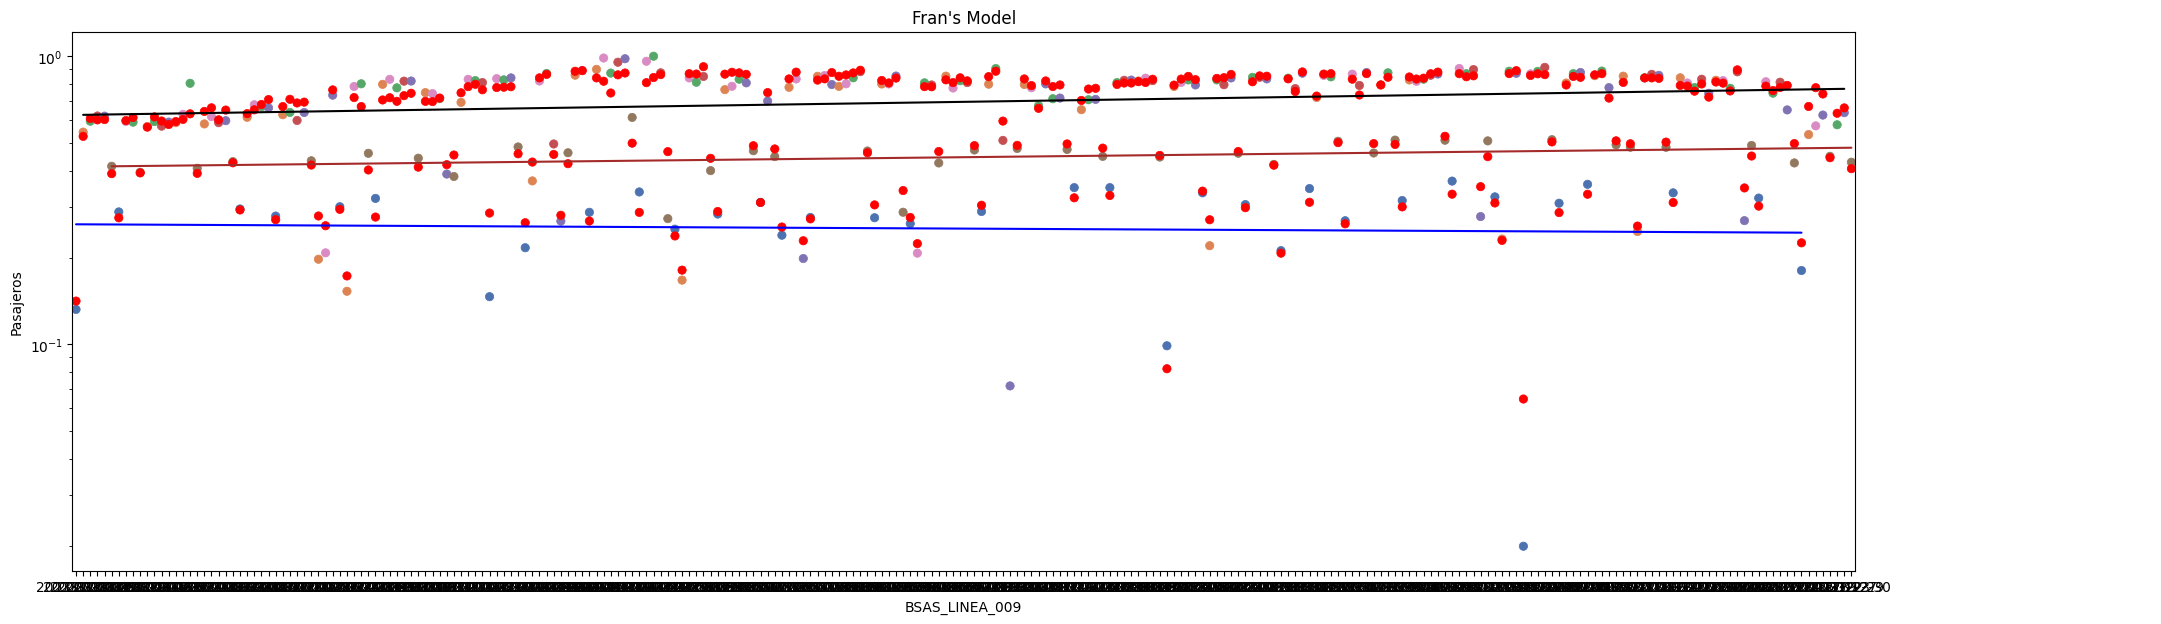

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(23, 7))


(
    so.Plot( data=pasajeros_por_linea )
    .add( so.Dot() ,x="DIA_TRANSPORTE", color="FECHA_DIA", y="BSAS_LINEA_009").scale(y="log")
    .add( so.Line(color="black"), so.PolyFit(1), data=pasajeros_por_linea [ pasajeros_por_linea["FECHA_DIA"].isin(["Mon", "Tue", "Wed", "Thu", "Fri"]) ] ,x="DIA_TRANSPORTE", y="BSAS_LINEA_009")
    .add( so.Line(color="brown"), so.PolyFit(1), data=pasajeros_por_linea [ pasajeros_por_linea["FECHA_DIA"].isin(["Sat"]) ] ,x="DIA_TRANSPORTE", y="BSAS_LINEA_009")
    .add( so.Line(color="blue"), so.PolyFit(1), data=pasajeros_por_linea [ pasajeros_por_linea["FECHA_DIA"].isin(["Sun"]) ] ,x="DIA_TRANSPORTE", y="BSAS_LINEA_009")

    .add( so.Dot(color="red"), x="DIA_TRANSPORTE", y=ytF_pred.flatten())

    .label(x="BSAS_LINEA_009", y="Pasajeros", legend="Dia", title="Fran's Model")
    .on(ax).plot()
)
plt.show()

# Ejercicio 5

G )

> Los modelos propuestos por los distintos grupos serán testeados en un conjunto de testeo
conteniendo días distintos a los utilizados para la construcción del modelo. Los equipos
que tengan los mejores desempeños obtendrán un punto bonus en la nota del TP.

.

---


Consideraciones: Recordar que el modelo predice, segun lo hablado en el aula, con datos normalizados!